In [ ]:
import os
import json

# 🔑 Replace with your actual Kaggle credentials
KAGGLE_USERNAME = "dhaveenchalangana"
KAGGLE_KEY = "6f7a8bca6ac2665b99625090aa3d6abf"

# Create the ~/.kaggle folder and kaggle.json file
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump({"username": KAGGLE_USERNAME, "key": KAGGLE_KEY}, f)

# Set file permissions (important on Linux/Colab)
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

# ✅ Now you can use the Kaggle API as usual
os.system("kaggle datasets download -d zynicide/wine-reviews")
os.system("unzip wine-reviews.zip -d wine/")


0

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import pandas as pd

pd.set_option("display.max_columns", None)


import matplotlib
matplotlib.use('Agg')  # Use Agg backend if full matplotlib is imported

import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # if only plt is imported

get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

RANDOM_SEED = 42

# Set default style for seaborn
sns.set(style='whitegrid')

In [ ]:
# Download the new dataset from Kaggle
os.system("kaggle datasets download -d amanik000/kidney-disease-dataset -p /content/")
os.system("unzip /content/kidney-disease-dataset.zip -d /content/")

# Load the dataset into a pandas DataFrame
pre_drop_df = pd.read_csv('/content/kidney_disease_dataset.csv')

print('Dataset loaded successfully.')
print('Shape:', pre_drop_df.shape)
display(pre_drop_df.head())

Dataset loaded successfully.
Shape: (20538, 43)


,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),Blood urea (mg/dl),Serum creatinine (mg/dl),Sodium level (mEq/L),Potassium level (mEq/L),Hemoglobin level (gms),Packed cell volume (%),White blood cell count (cells/cumm),Red blood cell count (millions/cumm),Hypertension (yes/no),Diabetes mellitus (yes/no),Coronary artery disease (yes/no),Appetite (good/poor),Pedal edema (yes/no),Anemia (yes/no),Estimated Glomerular Filtration Rate (eGFR),Urine protein-to-creatinine ratio,Urine output (ml/day),Serum albumin level,Cholesterol level,Parathyroid hormone (PTH) level,Serum calcium level,Serum phosphate level,Family history of chronic kidney disease,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,169.101369,7.55,146.068410,6.272576,11.8,35,5791,5.6,yes,yes,no,good,no,no,71.62,2.51,1397,3.23,152,65.078329,8.71,4.31,no,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,183.223479,13.37,123.501427,5.611303,8.2,25,5390,4.6,no,yes,no,good,yes,yes,13.93,4.27,1632,3.47,242,46.030692,10.41,5.78,yes,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,193.141665,9.49,149.456527,3.965957,10.1,46,12098,4.7,no,no,yes,good,yes,no,60.09,1.56,889,4.42,103,26.214653,9.14,3.66,no,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,125.939396,10.98,131.758843,4.980997,14.0,24,6747,4.8,no,no,yes,good,no,yes,31.62,3.19,2424,3.44,140,11.931283,9.81,3.71,no,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,197.188600,3.01,120.912465,4.097602,16.1,46,5759,5.7,no,no,no,good,yes,yes,36.61,1.23,893,4.14,149,34.909936,10.17,4.62,no,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


In [ ]:
print(pre_drop_df['Target'].unique())

['No_Disease' 'Low_Risk' 'Moderate_Risk' 'Severe_Disease' 'High_Risk']


In [ ]:
print(pre_drop_df['Target'].value_counts())

Target
No_Disease        16432
Low_Risk           2054
Moderate_Risk       821
High_Risk           821
Severe_Disease      410
Name: count, dtype: int64


In [ ]:
filtered_df = pre_drop_df[pre_drop_df['Target'].isin(['No_Disease', 'Severe_Disease'])].copy()

print("DataFrame filtered successfully.")
print('Shape:', filtered_df.shape)
display(filtered_df.head())
print('\nFiltered Target value counts:')
print(filtered_df['Target'].value_counts())

DataFrame filtered successfully.
Shape: (16842, 43)


,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),Blood urea (mg/dl),Serum creatinine (mg/dl),Sodium level (mEq/L),Potassium level (mEq/L),Hemoglobin level (gms),Packed cell volume (%),White blood cell count (cells/cumm),Red blood cell count (millions/cumm),Hypertension (yes/no),Diabetes mellitus (yes/no),Coronary artery disease (yes/no),Appetite (good/poor),Pedal edema (yes/no),Anemia (yes/no),Estimated Glomerular Filtration Rate (eGFR),Urine protein-to-creatinine ratio,Urine output (ml/day),Serum albumin level,Cholesterol level,Parathyroid hormone (PTH) level,Serum calcium level,Serum phosphate level,Family history of chronic kidney disease,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,169.101369,7.55,146.068410,6.272576,11.8,35,5791,5.6,yes,yes,no,good,no,no,71.62,2.51,1397,3.23,152,65.078329,8.71,4.31,no,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,193.141665,9.49,149.456527,3.965957,10.1,46,12098,4.7,no,no,yes,good,yes,no,60.09,1.56,889,4.42,103,26.214653,9.14,3.66,no,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,125.939396,10.98,131.758843,4.980997,14.0,24,6747,4.8,no,no,yes,good,no,yes,31.62,3.19,2424,3.44,140,11.931283,9.81,3.71,no,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,197.188600,3.01,120.912465,4.097602,16.1,46,5759,5.7,no,no,no,good,yes,yes,36.61,1.23,893,4.14,149,34.909936,10.17,4.62,no,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease
5,14,92,1.006,4,2,abnormal,abnormal,not present,present,371,132.802723,13.98,132.584281,3.835989,8.0,22,8214,2.8,yes,no,no,good,no,yes,52.18,0.67,1105,4.44,285,62.103514,8.73,5.28,no,yes,23.7,moderate,26,12,2.81,normal,2.33,2.98,No_Disease



Filtered Target value counts:
Target
No_Disease        16432
Severe_Disease      410
Name: count, dtype: int64


In [ ]:
print(filtered_df['Target'].value_counts())

Target
No_Disease        16432
Severe_Disease      410
Name: count, dtype: int64


In [ ]:
# Separate the two classes
no_disease_df = filtered_df[filtered_df['Target'] == 'No_Disease']
severe_disease_df = filtered_df[filtered_df['Target'] == 'Severe_Disease']

# Undersample the 'No_Disease' class
undersampled_no_disease_df = no_disease_df.sample(n=595, random_state=RANDOM_SEED)

# Concatenate the undersampled 'No_Disease' with 'Severe_Disease'
undersampled_df = pd.concat([undersampled_no_disease_df, severe_disease_df])

# Shuffle the DataFrame to mix the classes
undersampled_df = undersampled_df.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)

print("DataFrame undersampled successfully.")
print('Shape:', undersampled_df.shape)
print('\nUndersampled Target value counts:')
print(undersampled_df['Target'].value_counts())

DataFrame undersampled successfully.
Shape: (1005, 43)

Undersampled Target value counts:
Target
No_Disease        595
Severe_Disease    410
Name: count, dtype: int64


In [ ]:
df = undersampled_df.copy()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# # Data Loading
# data_path = '/content/drive/MyDrive/Ai final/CKD (kidney_disease_data_) (1).csv'
# df = pd.read_csv(data_path, delimiter=',', encoding='ascii')

# print('Dataset loaded successfully.')
# print('Shape:', df.shape)

In [ ]:
df.head()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),Blood urea (mg/dl),Serum creatinine (mg/dl),Sodium level (mEq/L),Potassium level (mEq/L),Hemoglobin level (gms),Packed cell volume (%),White blood cell count (cells/cumm),Red blood cell count (millions/cumm),Hypertension (yes/no),Diabetes mellitus (yes/no),Coronary artery disease (yes/no),Appetite (good/poor),Pedal edema (yes/no),Anemia (yes/no),Estimated Glomerular Filtration Rate (eGFR),Urine protein-to-creatinine ratio,Urine output (ml/day),Serum albumin level,Cholesterol level,Parathyroid hormone (PTH) level,Serum calcium level,Serum phosphate level,Family history of chronic kidney disease,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,81,146,1.023,0,4,normal,normal,present,present,335,108.329365,14.30,140.651936,5.899167,17.2,23,5422,4.4,no,no,yes,poor,no,no,22.86,1.30,1844,3.49,256,68.046341,7.66,4.63,no,yes,37.2,low,10,13,2.63,abnormal,3.91,10.89,Severe_Disease
1,86,144,1.021,5,3,abnormal,abnormal,present,present,151,114.784387,13.73,141.875124,5.764556,12.7,23,5787,4.9,yes,no,no,poor,yes,yes,52.37,3.91,972,2.71,165,40.298751,9.69,5.29,yes,yes,32.9,moderate,5,26,1.40,abnormal,1.54,12.57,Severe_Disease
2,32,179,1.016,3,1,abnormal,normal,present,present,367,170.598007,8.38,145.785495,3.595174,10.1,49,11485,3.2,yes,yes,no,poor,no,no,28.07,0.22,436,2.14,108,24.782471,9.08,3.40,yes,no,26.1,low,24,9,1.73,normal,1.15,9.26,Severe_Disease
3,43,174,1.025,1,4,abnormal,abnormal,present,present,456,102.308161,7.25,124.676337,3.767007,15.7,47,11323,2.8,yes,no,no,good,yes,no,73.77,2.40,2300,3.93,208,65.094389,8.56,5.96,no,no,23.6,low,30,27,2.75,abnormal,9.93,8.22,No_Disease
4,11,110,1.010,1,3,abnormal,abnormal,not present,present,184,52.309671,4.69,143.370619,5.000174,15.5,22,7408,3.4,no,no,no,good,yes,yes,13.23,1.47,1015,3.41,156,34.962621,8.71,2.77,no,no,22.9,high,20,4,2.14,normal,4.86,1.84,No_Disease


In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    print(col, df[col].unique()[:20])  # show first 10 unique values

Red blood cells in urine ['normal' 'abnormal']
Pus cells in urine ['normal' 'abnormal']
Pus cell clumps in urine ['present' 'not present']
Bacteria in urine ['present' 'not present']
Hypertension (yes/no) ['no' 'yes']
Diabetes mellitus (yes/no) ['no' 'yes']
Coronary artery disease (yes/no) ['yes' 'no']
Appetite (good/poor) ['poor' 'good']
Pedal edema (yes/no) ['no' 'yes']
Anemia (yes/no) ['no' 'yes']
Family history of chronic kidney disease ['no' 'yes']
Smoking status ['yes' 'no']
Physical activity level ['low' 'moderate' 'high']
Urinary sediment microscopy results ['abnormal' 'normal']
Target ['Severe_Disease' 'No_Disease']


In [ ]:
new_df = df.copy()

In [ ]:
new_df.columns = [
    'Age of the patient', 'Blood pressure (mm/Hg)',
       'Specific gravity of urine', 'Albumin in urine', 'Sugar in urine',
       'Red blood cells in urine', 'Pus cells in urine',
       'Pus cell clumps in urine', 'Bacteria in urine',
       'Random blood glucose level (mg/dl)', 'Blood urea (mg/dl)',
       'Serum creatinine (mg/dl)', 'Sodium level (mEq/L)',
       'Potassium level (mEq/L)', 'Hemoglobin level (gms)',
       'Packed cell volume (%)', 'White blood cell count (cells/cumm)',
       'Red blood cell count (millions/cumm)', 'Hypertension (yes/no)',
       'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)',
       'Appetite (good/poor)', 'Pedal edema (yes/no)', 'Anemia (yes/no)',
       'Estimated Glomerular Filtration Rate (eGFR)',
       'Urine protein-to-creatinine ratio', 'Urine output (ml/day)',
       'Serum albumin level', 'Cholesterol level',
       'Parathyroid hormone (PTH) level', 'Serum calcium level',
       'Serum phosphate level', 'Family history of chronic kidney disease',
       'Smoking status', 'Body Mass Index (BMI)', 'Physical activity level',
       'Duration of diabetes mellitus (years)',
       'Duration of hypertension (years)', 'Cystatin C level',
       'Urinary sediment microscopy results', 'C-reactive protein (CRP) level',
       'Interleukin-6 (IL-6) level', 'Target'
]

In [ ]:
# new labling
new_df.head()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),Blood urea (mg/dl),Serum creatinine (mg/dl),Sodium level (mEq/L),Potassium level (mEq/L),Hemoglobin level (gms),Packed cell volume (%),White blood cell count (cells/cumm),Red blood cell count (millions/cumm),Hypertension (yes/no),Diabetes mellitus (yes/no),Coronary artery disease (yes/no),Appetite (good/poor),Pedal edema (yes/no),Anemia (yes/no),Estimated Glomerular Filtration Rate (eGFR),Urine protein-to-creatinine ratio,Urine output (ml/day),Serum albumin level,Cholesterol level,Parathyroid hormone (PTH) level,Serum calcium level,Serum phosphate level,Family history of chronic kidney disease,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,81,146,1.023,0,4,normal,normal,present,present,335,108.329365,14.30,140.651936,5.899167,17.2,23,5422,4.4,no,no,yes,poor,no,no,22.86,1.30,1844,3.49,256,68.046341,7.66,4.63,no,yes,37.2,low,10,13,2.63,abnormal,3.91,10.89,Severe_Disease
1,86,144,1.021,5,3,abnormal,abnormal,present,present,151,114.784387,13.73,141.875124,5.764556,12.7,23,5787,4.9,yes,no,no,poor,yes,yes,52.37,3.91,972,2.71,165,40.298751,9.69,5.29,yes,yes,32.9,moderate,5,26,1.40,abnormal,1.54,12.57,Severe_Disease
2,32,179,1.016,3,1,abnormal,normal,present,present,367,170.598007,8.38,145.785495,3.595174,10.1,49,11485,3.2,yes,yes,no,poor,no,no,28.07,0.22,436,2.14,108,24.782471,9.08,3.40,yes,no,26.1,low,24,9,1.73,normal,1.15,9.26,Severe_Disease
3,43,174,1.025,1,4,abnormal,abnormal,present,present,456,102.308161,7.25,124.676337,3.767007,15.7,47,11323,2.8,yes,no,no,good,yes,no,73.77,2.40,2300,3.93,208,65.094389,8.56,5.96,no,no,23.6,low,30,27,2.75,abnormal,9.93,8.22,No_Disease
4,11,110,1.010,1,3,abnormal,abnormal,not present,present,184,52.309671,4.69,143.370619,5.000174,15.5,22,7408,3.4,no,no,no,good,yes,yes,13.23,1.47,1015,3.41,156,34.962621,8.71,2.77,no,no,22.9,high,20,4,2.14,normal,4.86,1.84,No_Disease


# No preprocessing Model train and evaluate

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score # Import f1_score

# Separate features and target variable using the original df
X_base = df.drop('Target', axis=1)
y_base = df['Target']

# Encode the target variable
y_base = y_base.map({'No_Disease': 0, 'Severe_Disease': 1})


# Identify categorical columns in the base data
categorical_cols_base = X_base.select_dtypes(include='object').columns

# One-hot encode categorical columns in the base data
X_base = pd.get_dummies(X_base, columns=categorical_cols_base, drop_first=True)


# Split data into training and testing sets
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.2, random_state=RANDOM_SEED, stratify=y_base)

# Train a K-Nearest Neighbors model on the base data
knn_base = KNeighborsClassifier(n_neighbors=100) # Using a large number of neighbors to reduce accuracy
knn_base.fit(X_train_base, y_train_base)

# Make predictions
y_pred_base = knn_base.predict(X_test_base)

# Evaluate the base model
accuracy_base = accuracy_score(y_test_base, y_pred_base)
conf_matrix_base = confusion_matrix(y_test_base, y_pred_base)
f1_base = f1_score(y_test_base, y_pred_base) # Calculate F1 score


print("Base K-Nearest Neighbors Model Evaluation (on unprocessed data):")
print(f"Accuracy: {accuracy_base:.4f}")
print(f"F1 Score: {f1_base:.4f}") # Print F1 score
print("Confusion Matrix:")
print(conf_matrix_base)

Base K-Nearest Neighbors Model Evaluation (on unprocessed data):
Accuracy: 0.5473
F1 Score: 0.0215
Confusion Matrix:
[[109  10]
 [ 81   1]]


# **Pre Processing**

## **1.Drop unecasasry columns**

In [ ]:
#before
df.head()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),Blood urea (mg/dl),Serum creatinine (mg/dl),Sodium level (mEq/L),Potassium level (mEq/L),Hemoglobin level (gms),Packed cell volume (%),White blood cell count (cells/cumm),Red blood cell count (millions/cumm),Hypertension (yes/no),Diabetes mellitus (yes/no),Coronary artery disease (yes/no),Appetite (good/poor),Pedal edema (yes/no),Anemia (yes/no),Estimated Glomerular Filtration Rate (eGFR),Urine protein-to-creatinine ratio,Urine output (ml/day),Serum albumin level,Cholesterol level,Parathyroid hormone (PTH) level,Serum calcium level,Serum phosphate level,Family history of chronic kidney disease,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,81,146,1.023,0,4,normal,normal,present,present,335,108.329365,14.30,140.651936,5.899167,17.2,23,5422,4.4,no,no,yes,poor,no,no,22.86,1.30,1844,3.49,256,68.046341,7.66,4.63,no,yes,37.2,low,10,13,2.63,abnormal,3.91,10.89,Severe_Disease
1,86,144,1.021,5,3,abnormal,abnormal,present,present,151,114.784387,13.73,141.875124,5.764556,12.7,23,5787,4.9,yes,no,no,poor,yes,yes,52.37,3.91,972,2.71,165,40.298751,9.69,5.29,yes,yes,32.9,moderate,5,26,1.40,abnormal,1.54,12.57,Severe_Disease
2,32,179,1.016,3,1,abnormal,normal,present,present,367,170.598007,8.38,145.785495,3.595174,10.1,49,11485,3.2,yes,yes,no,poor,no,no,28.07,0.22,436,2.14,108,24.782471,9.08,3.40,yes,no,26.1,low,24,9,1.73,normal,1.15,9.26,Severe_Disease
3,43,174,1.025,1,4,abnormal,abnormal,present,present,456,102.308161,7.25,124.676337,3.767007,15.7,47,11323,2.8,yes,no,no,good,yes,no,73.77,2.40,2300,3.93,208,65.094389,8.56,5.96,no,no,23.6,low,30,27,2.75,abnormal,9.93,8.22,No_Disease
4,11,110,1.010,1,3,abnormal,abnormal,not present,present,184,52.309671,4.69,143.370619,5.000174,15.5,22,7408,3.4,no,no,no,good,yes,yes,13.23,1.47,1015,3.41,156,34.962621,8.71,2.77,no,no,22.9,high,20,4,2.14,normal,4.86,1.84,No_Disease


In [ ]:
if 'id' in new_df.columns:
    print("'id' column exists in new_df")
else:
    print("'id' column does not exist in new_df")

'id' column does not exist in new_df


In [ ]:
# backup of this table to do before or after comparisons on data cleaning
new_df_bef = new_df.copy()

## 2. This step had to be moved down before step number 6 because values needed to be converted into numbers before outlier detection

## **3. Missing Value replace with mean and mode**





In [ ]:
# Calculate missing values
missing_values = new_df.isnull().sum()

# Filter out columns with no missing values for better visualization
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    # Plot missing values
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar')
    plt.title('Number of Missing Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the DataFrame.")

No missing values found in the DataFrame.


In [ ]:
# Identify numerical and categorical columns
numerical_cols = new_df.select_dtypes(include=np.number).columns
categorical_cols = new_df.select_dtypes(include='object').columns

# Fill missing values in numerical columns with the mean
for col in numerical_cols:
    new_df[col] = new_df[col].fillna(new_df[col].mean())

# Fill missing values in categorical columns with the mode
for col in categorical_cols:
    new_df[col] = new_df[col].fillna(new_df[col].mode()[0])

print("Missing values filled successfully.")

Missing values filled successfully.


In [ ]:
# Calculate missing values
missing_values = new_df.isnull().sum()

# Filter out columns with no missing values for better visualization
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    # Plot missing values
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar')
    plt.title('Number of Missing Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the DataFrame.")

No missing values found in the DataFrame.


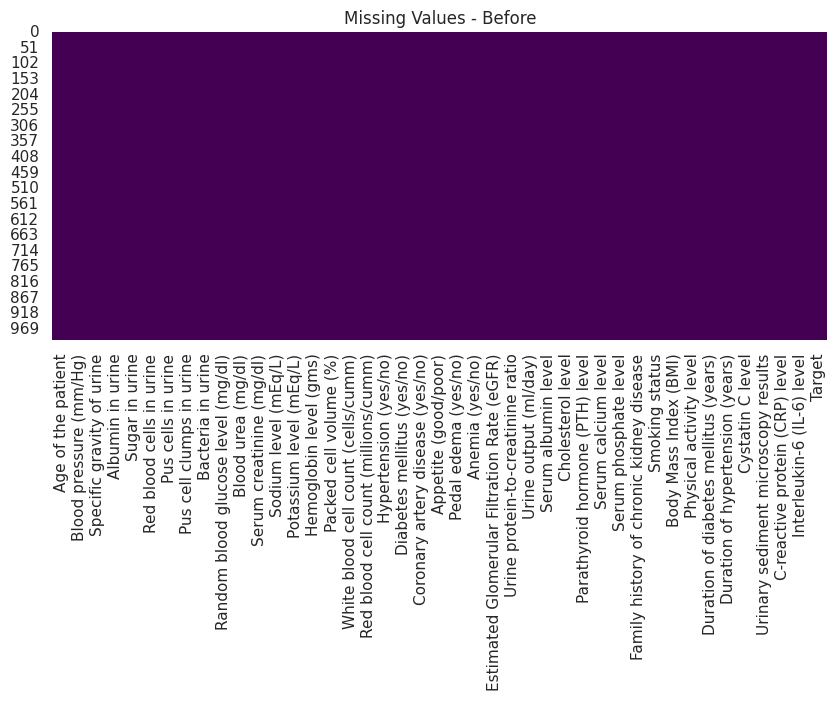

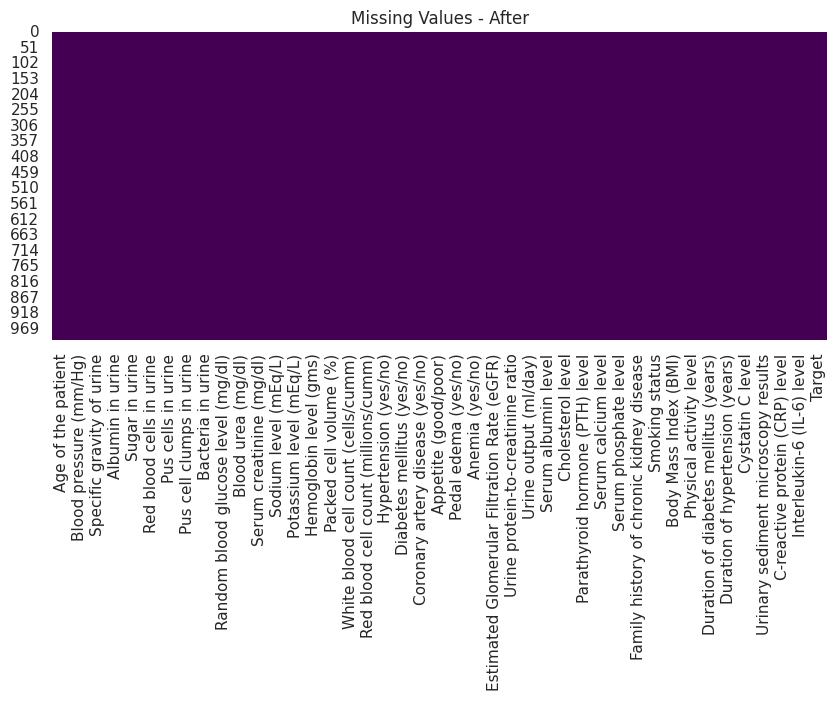

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values - Before")
plt.show()

# After
plt.figure(figsize=(10,4))
sns.heatmap(new_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values - After")
plt.show()

In [ ]:
print("Missing values per column after filling:")
print(new_df.isnull().sum())

Missing values per column after filling:
Age of the patient                             0
Blood pressure (mm/Hg)                         0
Specific gravity of urine                      0
Albumin in urine                               0
Sugar in urine                                 0
Red blood cells in urine                       0
Pus cells in urine                             0
Pus cell clumps in urine                       0
Bacteria in urine                              0
Random blood glucose level (mg/dl)             0
Blood urea (mg/dl)                             0
Serum creatinine (mg/dl)                       0
Sodium level (mEq/L)                           0
Potassium level (mEq/L)                        0
Hemoglobin level (gms)                         0
Packed cell volume (%)                         0
White blood cell count (cells/cumm)            0
Red blood cell count (millions/cumm)           0
Hypertension (yes/no)                          0
Diabetes mellitus (yes/no)  

In [ ]:
# Misc Missed pre processing stuff

# Columns identified as having non-numeric issues
cols_to_clean_numeric = ['Packed cell volume (%)', 'White blood cell count (cells/cumm)', 'Red blood cell count (millions/cumm)']

print("Checking and handling non-numeric values in specified columns:")

for col in cols_to_clean_numeric:
    # Identify non-numeric values before conversion
    non_numeric_values = new_df[col][pd.to_numeric(new_df[col], errors='coerce').isna()].unique()
    if len(non_numeric_values) > 0:
        print(f"Column '{col}' contains non-numeric values: {non_numeric_values}")

    # Convert to numeric, coercing errors to NaN
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce')

    # Fill the newly created NaNs with the mean of the column
    mean_value = new_df[col].mean()
    new_df[col] = new_df[col].fillna(mean_value)
    print(f"Filled missing values in '{col}' with mean: {mean_value:.2f}")


print("\nNon-numeric values in specified columns have been handled.")

# Verify that these columns are now numeric and have no missing values
for col in cols_to_clean_numeric:
    print(f"Column '{col}' data type: {new_df[col].dtype}, Missing values: {new_df[col].isnull().sum()}")

Checking and handling non-numeric values in specified columns:
Filled missing values in 'Packed cell volume (%)' with mean: 37.32
Filled missing values in 'White blood cell count (cells/cumm)' with mean: 8889.64
Filled missing values in 'Red blood cell count (millions/cumm)' with mean: 4.25

Non-numeric values in specified columns have been handled.
Column 'Packed cell volume (%)' data type: int64, Missing values: 0
Column 'White blood cell count (cells/cumm)' data type: int64, Missing values: 0
Column 'Red blood cell count (millions/cumm)' data type: float64, Missing values: 0


## 4. Fix Typos (errors in data entering)

In [ ]:
# see what are the different labes if they are binary or not
print(f"diabetes_mellitus : {new_df['Diabetes mellitus (yes/no)'].unique()}")
print(f"coronary_artery_disease :{new_df['Coronary artery disease (yes/no)'].unique()}")
print(f"class : {new_df['Target'].unique()}")

#typos before

diabetes_mellitus : ['no' 'yes']
coronary_artery_disease :['yes' 'no']
class : ['Severe_Disease' 'No_Disease']


In [ ]:
for col in new_df.select_dtypes(include=['object']).columns:
    print(col, new_df[col].unique()[:20])  # show first 10 unique values

Red blood cells in urine ['normal' 'abnormal']
Pus cells in urine ['normal' 'abnormal']
Pus cell clumps in urine ['present' 'not present']
Bacteria in urine ['present' 'not present']
Hypertension (yes/no) ['no' 'yes']
Diabetes mellitus (yes/no) ['no' 'yes']
Coronary artery disease (yes/no) ['yes' 'no']
Appetite (good/poor) ['poor' 'good']
Pedal edema (yes/no) ['no' 'yes']
Anemia (yes/no) ['no' 'yes']
Family history of chronic kidney disease ['no' 'yes']
Smoking status ['yes' 'no']
Physical activity level ['low' 'moderate' 'high']
Urinary sediment microscopy results ['abnormal' 'normal']
Target ['Severe_Disease' 'No_Disease']


In [ ]:
# lable typing mistakes into correct yes or no
new_df['Diabetes mellitus (yes/no)'] = new_df['Diabetes mellitus (yes/no)'].replace(to_replace={" yes":"yes","\tyes":"yes","\tno":"no"})
new_df['Coronary artery disease (yes/no)'] = new_df['Coronary artery disease (yes/no)'].replace(to_replace={"\tno":"no"})
# Removed the incorrect typo fixing for 'Target' column as it was causing issues.
# new_df['Target'] = new_df['Target'].replace(to_replace={"ckd\t":"Severe_Disease","notckd":"No_Disease"})

In [ ]:
#after
# see what are the different labes if they are binary or not
print(f"diabetes_mellitus : {new_df['Diabetes mellitus (yes/no)'].unique()}")
print(f"coronary_artery_disease :{new_df['Coronary artery disease (yes/no)'].unique()}")
print(f"class : {new_df['Target'].unique()}")

#after typos

diabetes_mellitus : ['no' 'yes']
coronary_artery_disease :['yes' 'no']
class : ['Severe_Disease' 'No_Disease']


## 5. Encode Text Labels into Numerical

In [ ]:
# Fill missing values in categorical columns with the mode before encoding
for col in ['Red blood cells in urine', 'Pus cells in urine', 'Pus cell clumps in urine', 'Bacteria in urine', 'Hypertension (yes/no)', 'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)', 'Appetite (good/poor)', 'Pedal edema (yes/no)', 'Anemia (yes/no)', 'Target']:
    if new_df[col].isnull().any():
        mode_value = new_df[col].mode()[0]
        new_df[col] = new_df[col].fillna(mode_value)

new_df['Target'] = new_df['Target'].map({'Severe_Disease': 1, 'No_Disease': 0})
new_df['Red blood cells in urine'] = new_df['Red blood cells in urine'].map({'normal': 1, 'abnormal': 0})
new_df['Pus cells in urine'] = new_df['Pus cells in urine'].map({'normal': 1, 'abnormal': 0})
new_df['Pus cell clumps in urine'] = new_df['Pus cell clumps in urine'].map({'present': 1, 'not present': 0})
new_df['Bacteria in urine'] = new_df['Bacteria in urine'].map({'present': 1, 'not present': 0})
new_df['Hypertension (yes/no)'] = new_df['Hypertension (yes/no)'].map({'yes': 1, 'no': 0})
new_df['Diabetes mellitus (yes/no)'] = new_df['Diabetes mellitus (yes/no)'].map({'yes': 1, 'no': 0})
new_df['Coronary artery disease (yes/no)'] = new_df['Coronary artery disease (yes/no)'].map({'yes': 1, 'no': 0})
new_df['Appetite (good/poor)'] = new_df['Appetite (good/poor)'].map({'good': 1, 'poor': 0})
new_df['Pedal edema (yes/no)'] = new_df['Pedal edema (yes/no)'].map({'yes': 1, 'no': 0})
new_df['Anemia (yes/no)'] = new_df['Anemia (yes/no)'].map({'yes': 1, 'no': 0})

In [ ]:
new_df.head()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),Blood urea (mg/dl),Serum creatinine (mg/dl),Sodium level (mEq/L),Potassium level (mEq/L),Hemoglobin level (gms),Packed cell volume (%),White blood cell count (cells/cumm),Red blood cell count (millions/cumm),Hypertension (yes/no),Diabetes mellitus (yes/no),Coronary artery disease (yes/no),Appetite (good/poor),Pedal edema (yes/no),Anemia (yes/no),Estimated Glomerular Filtration Rate (eGFR),Urine protein-to-creatinine ratio,Urine output (ml/day),Serum albumin level,Cholesterol level,Parathyroid hormone (PTH) level,Serum calcium level,Serum phosphate level,Family history of chronic kidney disease,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,81,146,1.023,0,4,1,1,1,1,335,108.329365,14.30,140.651936,5.899167,17.2,23,5422,4.4,0,0,1,0,0,0,22.86,1.30,1844,3.49,256,68.046341,7.66,4.63,no,yes,37.2,low,10,13,2.63,abnormal,3.91,10.89,1
1,86,144,1.021,5,3,0,0,1,1,151,114.784387,13.73,141.875124,5.764556,12.7,23,5787,4.9,1,0,0,0,1,1,52.37,3.91,972,2.71,165,40.298751,9.69,5.29,yes,yes,32.9,moderate,5,26,1.40,abnormal,1.54,12.57,1
2,32,179,1.016,3,1,0,1,1,1,367,170.598007,8.38,145.785495,3.595174,10.1,49,11485,3.2,1,1,0,0,0,0,28.07,0.22,436,2.14,108,24.782471,9.08,3.40,yes,no,26.1,low,24,9,1.73,normal,1.15,9.26,1
3,43,174,1.025,1,4,0,0,1,1,456,102.308161,7.25,124.676337,3.767007,15.7,47,11323,2.8,1,0,0,1,1,0,73.77,2.40,2300,3.93,208,65.094389,8.56,5.96,no,no,23.6,low,30,27,2.75,abnormal,9.93,8.22,0
4,11,110,1.010,1,3,0,0,0,1,184,52.309671,4.69,143.370619,5.000174,15.5,22,7408,3.4,0,0,0,1,1,1,13.23,1.47,1015,3.41,156,34.962621,8.71,2.77,no,no,22.9,high,20,4,2.14,normal,4.86,1.84,0


## 06. Scale Data

## * 2. Outlier Detection And Removal *

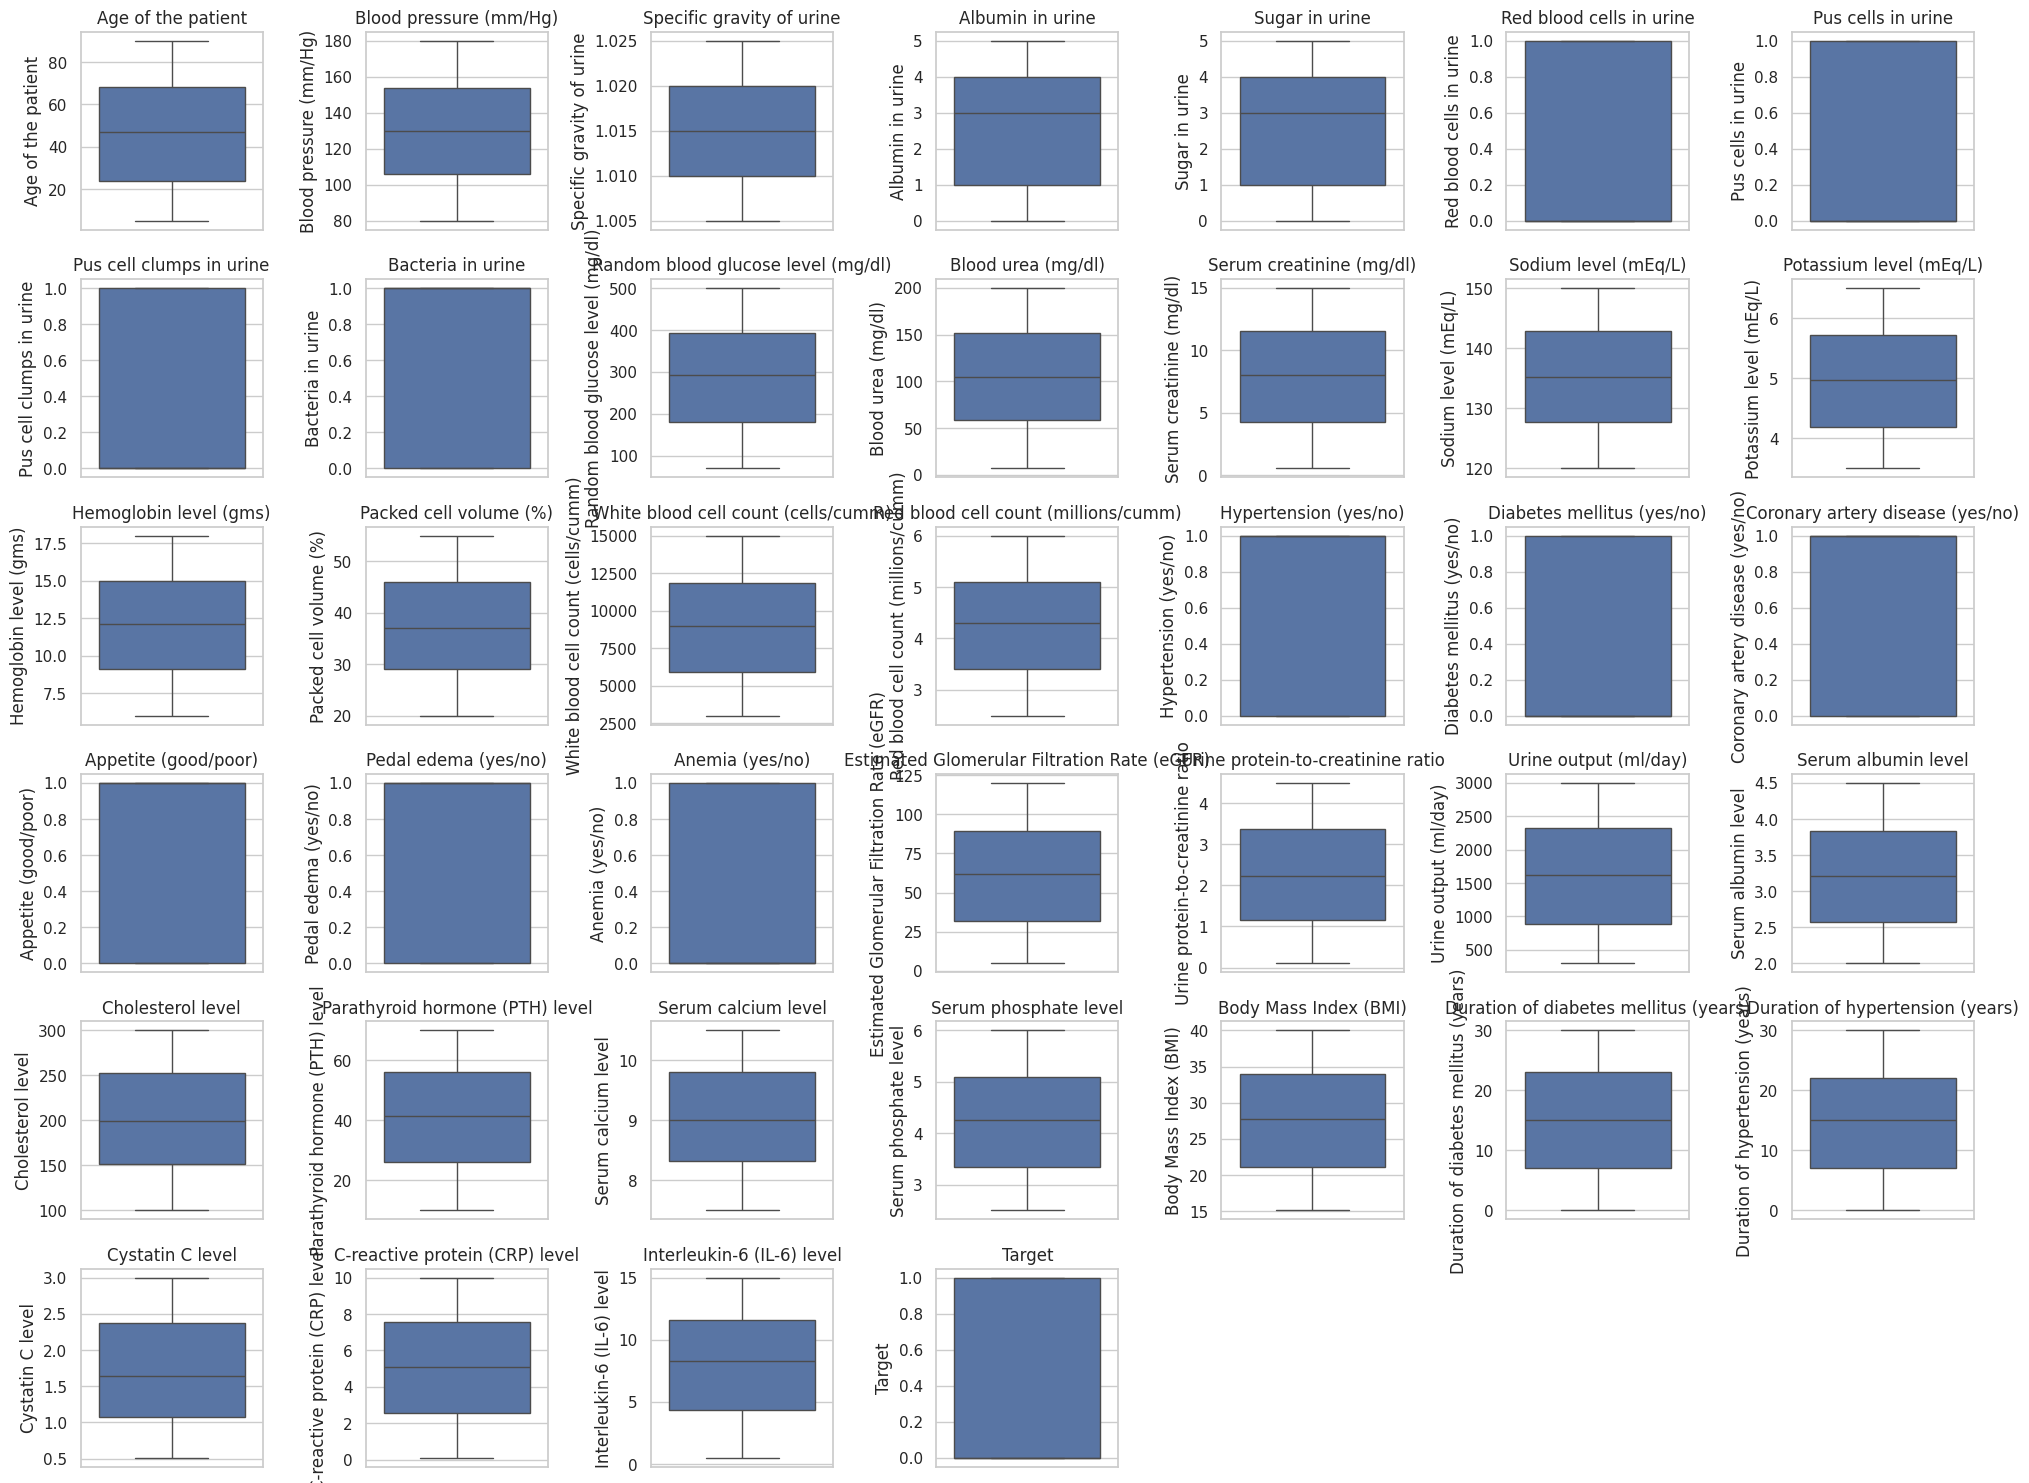

In [ ]:
# Fill missing values in the mapped categorical columns with the mode
for col in ['Red blood cells in urine', 'Pus cells in urine', 'Pus cell clumps in urine', 'Bacteria in urine', 'Hypertension (yes/no)', 'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)', 'Appetite (good/poor)', 'Pedal edema (yes/no)', 'Anemia (yes/no)', 'Target']:
    if new_df[col].isnull().any():
        mode_value = new_df[col].mode()[0]
        new_df[col] = new_df[col].fillna(mode_value)

# Create boxplots for numerical columns to visualize outliers
numerical_cols = new_df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 15))  # Increased figure size
n_cols = 7
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=new_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Apply outlier removal to numerical columns, excluding binary encoded ones
numerical_cols = new_df.select_dtypes(include=np.number).columns.tolist()
binary_encoded_cols = ['Red blood cells in urine', 'Pus cells in urine', 'Pus cell clumps in urine', 'Bacteria in urine', 'Hypertension (yes/no)', 'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)', 'Appetite (good/poor)', 'Pedal edema (yes/no)', 'Anemia (yes/no)', 'Target']

cols_for_outlier_removal = [col for col in numerical_cols if col not in binary_encoded_cols]

new_df_cleaned = new_df.copy() # Create a copy to avoid modifying the original new_df

for col in cols_for_outlier_removal:
    initial_shape = new_df_cleaned.shape[0]
    new_df_cleaned = remove_outliers_iqr(new_df_cleaned, col)
    rows_removed = initial_shape - new_df_cleaned.shape[0]
    print(f"Removed {rows_removed} outliers from column '{col}'.")

print("\nOutliers removed from appropriate numerical columns.")
print("Shape before outlier removal:", new_df.shape)
print("Shape after outlier removal:", new_df_cleaned.shape)

new_df = new_df_cleaned # Update new_df to the cleaned version

Removed 0 outliers from column 'Age of the patient'.
Removed 0 outliers from column 'Blood pressure (mm/Hg)'.
Removed 0 outliers from column 'Specific gravity of urine'.
Removed 0 outliers from column 'Albumin in urine'.
Removed 0 outliers from column 'Sugar in urine'.
Removed 0 outliers from column 'Random blood glucose level (mg/dl)'.
Removed 0 outliers from column 'Blood urea (mg/dl)'.
Removed 0 outliers from column 'Serum creatinine (mg/dl)'.
Removed 0 outliers from column 'Sodium level (mEq/L)'.
Removed 0 outliers from column 'Potassium level (mEq/L)'.
Removed 0 outliers from column 'Hemoglobin level (gms)'.
Removed 0 outliers from column 'Packed cell volume (%)'.
Removed 0 outliers from column 'White blood cell count (cells/cumm)'.
Removed 0 outliers from column 'Red blood cell count (millions/cumm)'.
Removed 0 outliers from column 'Estimated Glomerular Filtration Rate (eGFR)'.
Removed 0 outliers from column 'Urine protein-to-creatinine ratio'.
Removed 0 outliers from column 'Uri

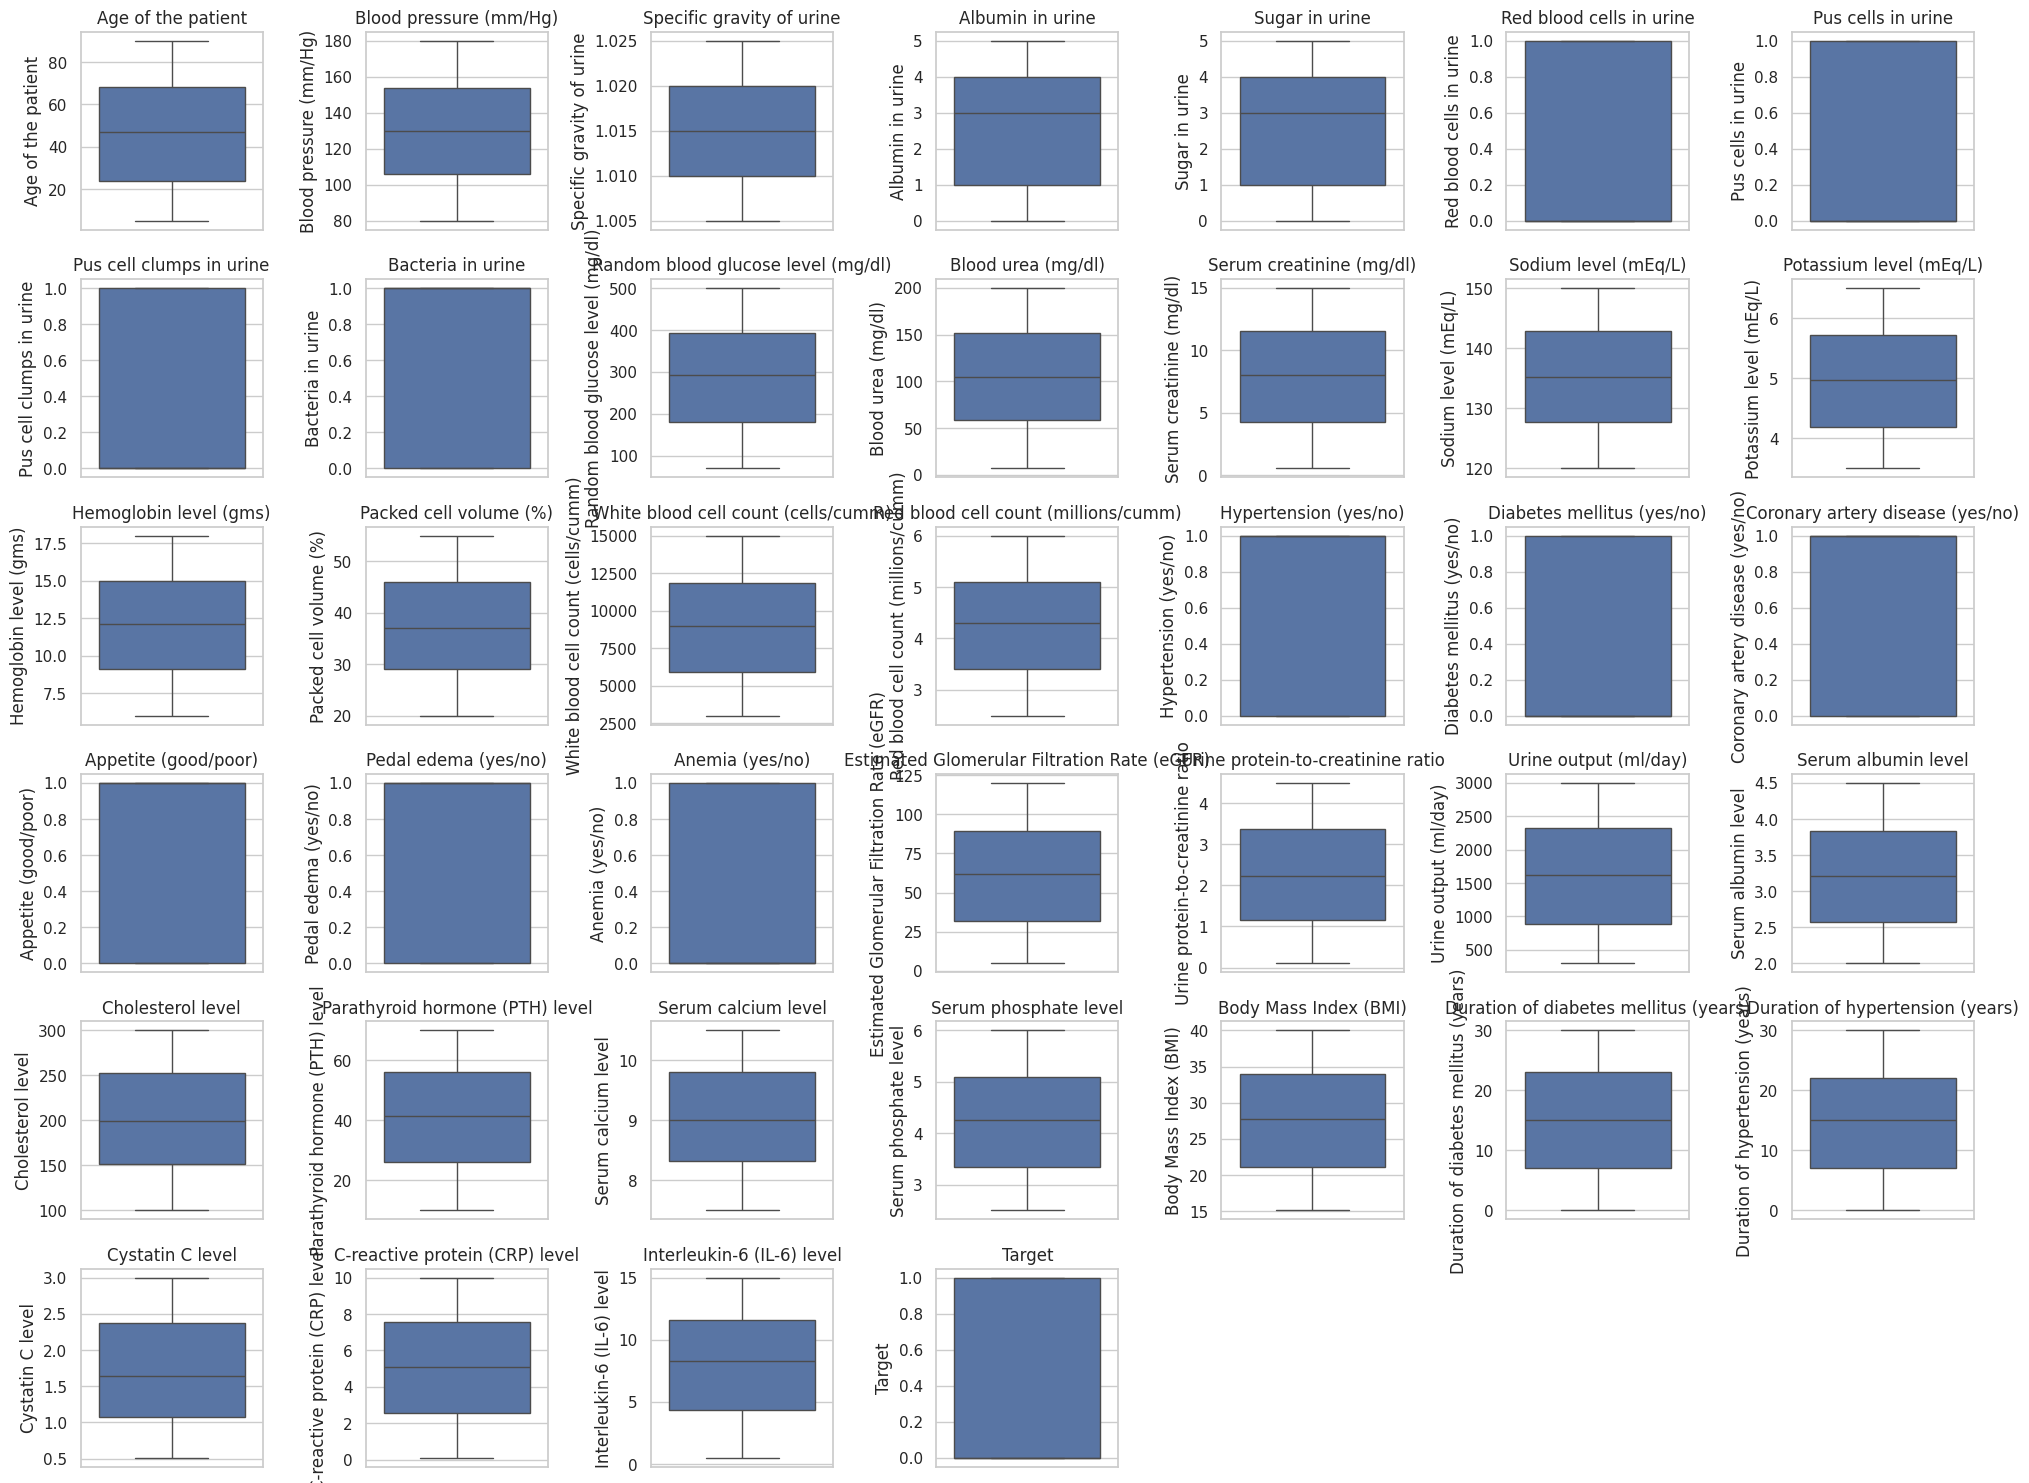

In [ ]:
# Create boxplots for numerical columns to visualize outliers
numerical_cols = new_df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 15))  # Increased figure size
n_cols = 7
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=new_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
new_df.describe()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),Blood urea (mg/dl),Serum creatinine (mg/dl),Sodium level (mEq/L),Potassium level (mEq/L),Hemoglobin level (gms),Packed cell volume (%),White blood cell count (cells/cumm),Red blood cell count (millions/cumm),Hypertension (yes/no),Diabetes mellitus (yes/no),Coronary artery disease (yes/no),Appetite (good/poor),Pedal edema (yes/no),Anemia (yes/no),Estimated Glomerular Filtration Rate (eGFR),Urine protein-to-creatinine ratio,Urine output (ml/day),Serum albumin level,Cholesterol level,Parathyroid hormone (PTH) level,Serum calcium level,Serum phosphate level,Body Mass Index (BMI),Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.00000
mean,46.481592,129.832836,1.014799,2.522388,2.501493,0.492537,0.493532,0.486567,0.504478,288.295522,104.200048,7.858677,135.174559,4.968322,12.008657,37.315423,8889.640796,4.251642,0.505473,0.481592,0.520398,0.504478,0.527363,0.479602,60.856159,2.249353,1622.809950,3.209970,200.555224,40.582143,9.036617,4.222537,27.546169,15.112438,14.519403,1.707930,5.106149,8.004637,0.40796
std,24.763561,28.858770,0.005775,1.673780,1.720294,0.500193,0.500207,0.500068,0.500229,124.630551,55.586896,4.194992,8.708094,0.868718,3.494235,10.240096,3468.107100,1.017687,0.500219,0.499910,0.499832,0.500229,0.499499,0.499832,32.769127,1.278655,798.074943,0.714402,58.668681,17.321754,0.874817,1.006282,7.238406,9.023006,8.845896,0.721501,2.879556,4.192556,0.49170
min,5.000000,80.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,7.104736,0.540000,120.006809,3.504253,6.000000,20.000000,3002.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.110000,302.000000,2.000000,100.000000,10.000045,7.500000,2.500000,15.100000,0.000000,0.000000,0.510000,0.100000,0.500000,0.00000
25%,24.000000,106.000000,1.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,180.000000,58.299525,4.210000,127.691259,4.193499,9.100000,29.000000,5894.000000,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.040000,1.150000,883.000000,2.570000,151.000000,26.217524,8.320000,3.350000,21.100000,7.000000,7.000000,1.080000,2.580000,4.340000,0.00000
50%,47.000000,130.000000,1.015000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,292.000000,104.487028,8.030000,135.200736,4.973088,12.100000,37.000000,8959.000000,4.300000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,61.630000,2.220000,1628.000000,3.210000,199.000000,41.382427,9.000000,4.260000,27.800000,15.000000,15.000000,1.640000,5.090000,8.310000,0.00000
75%,68.000000,154.000000,1.020000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,394.000000,151.746547,11.520000,142.824731,5.723776,15.000000,46.000000,11840.000000,5.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.370000,3.370000,2329.000000,3.830000,253.000000,55.918940,9.800000,5.090000,33.900000,23.000000,22.000000,2.370000,7.550000,11.610000,1.00000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,500.000000,199.635574,14.980000,149.984506,6.496998,18.000000,55.000000,14999.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,119.970000,4.490000,3000.000000,4.500000,300.000000,69.924361,10.500000,6.000000,40.00

In [ ]:
# One-hot encode 'Physical activity level'
new_df = pd.get_dummies(new_df, columns=['Physical activity level'], prefix='Physical activity level')

# Binary encode the remaining object type columns
for col in ['Family history of chronic kidney disease', 'Smoking status', 'Urinary sediment microscopy results']:
    new_df[col] = new_df[col].map({'yes': 1, 'no': 0, 'normal': 1, 'abnormal': 0})

display(new_df.head())

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),Blood urea (mg/dl),Serum creatinine (mg/dl),Sodium level (mEq/L),Potassium level (mEq/L),Hemoglobin level (gms),Packed cell volume (%),White blood cell count (cells/cumm),Red blood cell count (millions/cumm),Hypertension (yes/no),Diabetes mellitus (yes/no),Coronary artery disease (yes/no),Appetite (good/poor),Pedal edema (yes/no),Anemia (yes/no),Estimated Glomerular Filtration Rate (eGFR),Urine protein-to-creatinine ratio,Urine output (ml/day),Serum albumin level,Cholesterol level,Parathyroid hormone (PTH) level,Serum calcium level,Serum phosphate level,Family history of chronic kidney disease,Smoking status,Body Mass Index (BMI),Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target,Physical activity level_high,Physical activity level_low,Physical activity level_moderate
0,81,146,1.023,0,4,1,1,1,1,335,108.329365,14.30,140.651936,5.899167,17.2,23,5422,4.4,0,0,1,0,0,0,22.86,1.30,1844,3.49,256,68.046341,7.66,4.63,0,1,37.2,10,13,2.63,0,3.91,10.89,1,False,True,False
1,86,144,1.021,5,3,0,0,1,1,151,114.784387,13.73,141.875124,5.764556,12.7,23,5787,4.9,1,0,0,0,1,1,52.37,3.91,972,2.71,165,40.298751,9.69,5.29,1,1,32.9,5,26,1.40,0,1.54,12.57,1,False,False,True
2,32,179,1.016,3,1,0,1,1,1,367,170.598007,8.38,145.785495,3.595174,10.1,49,11485,3.2,1,1,0,0,0,0,28.07,0.22,436,2.14,108,24.782471,9.08,3.40,1,0,26.1,24,9,1.73,1,1.15,9.26,1,False,True,False
3,43,174,1.025,1,4,0,0,1,1,456,102.308161,7.25,124.676337,3.767007,15.7,47,11323,2.8,1,0,0,1,1,0,73.77,2.40,2300,3.93,208,65.094389,8.56,5.96,0,0,23.6,30,27,2.75,0,9.93,8.22,0,False,True,False
4,11,110,1.010,1,3,0,0,0,1,184,52.309671,4.69,143.370619,5.000174,15.5,22,7408,3.4,0,0,0,1,1,1,13.23,1.47,1015,3.41,156,34.962621,8.71,2.77,0,0,22.9,20,4,2.14,1,4.86,1.84,0,True,False,False


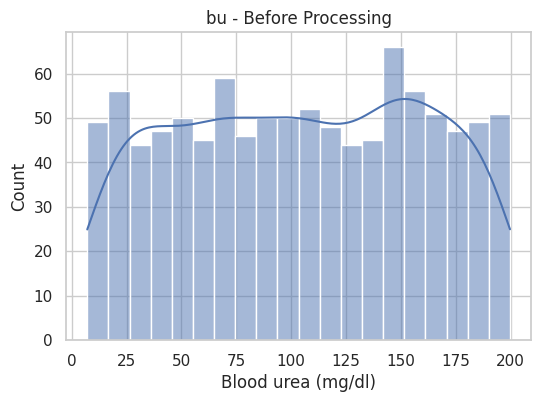

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Before (using the original df dataframe)
plt.figure(figsize=(6,4))
sns.histplot(new_df['Blood urea (mg/dl)'].dropna(), bins=20, kde=True) # Drop NaNs for plotting
plt.title('bu - Before Processing')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select only numerical columns for scaling
numerical_cols = new_df.select_dtypes(include=np.number).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical columns
new_df[numerical_cols] = scaler.fit_transform(new_df[numerical_cols])

print("Min-Max scaling applied to numerical columns.")
display(new_df.head())

Min-Max scaling applied to numerical columns.


,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),Blood urea (mg/dl),Serum creatinine (mg/dl),Sodium level (mEq/L),Potassium level (mEq/L),Hemoglobin level (gms),Packed cell volume (%),White blood cell count (cells/cumm),Red blood cell count (millions/cumm),Hypertension (yes/no),Diabetes mellitus (yes/no),Coronary artery disease (yes/no),Appetite (good/poor),Pedal edema (yes/no),Anemia (yes/no),Estimated Glomerular Filtration Rate (eGFR),Urine protein-to-creatinine ratio,Urine output (ml/day),Serum albumin level,Cholesterol level,Parathyroid hormone (PTH) level,Serum calcium level,Serum phosphate level,Family history of chronic kidney disease,Smoking status,Body Mass Index (BMI),Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target,Physical activity level_high,Physical activity level_low,Physical activity level_moderate
0,0.894118,0.66,0.90,0.0,0.8,1.0,1.0,1.0,1.0,0.616279,0.525758,0.952909,0.688683,0.800240,0.933333,0.085714,0.201717,0.542857,0.0,0.0,1.0,0.0,0.0,0.0,0.155345,0.271689,0.571534,0.596,0.780,0.968660,0.053333,0.608571,0.0,1.0,0.887550,0.333333,0.433333,0.851406,0.0,0.384848,0.716552,1.0,False,True,False
1,0.952941,0.64,0.80,1.0,0.6,0.0,0.0,1.0,1.0,0.188372,0.559285,0.913435,0.729486,0.755261,0.558333,0.085714,0.232141,0.685714,1.0,0.0,0.0,0.0,1.0,1.0,0.412021,0.867580,0.248332,0.284,0.325,0.505616,0.730000,0.797143,1.0,1.0,0.714859,0.166667,0.866667,0.357430,0.0,0.145455,0.832414,1.0,False,False,True
2,0.317647,0.99,0.55,0.6,0.2,0.0,1.0,1.0,1.0,0.690698,0.849180,0.542936,0.859929,0.030380,0.341667,0.828571,0.707093,0.200000,1.0,1.0,0.0,0.0,0.0,0.0,0.200661,0.025114,0.049666,0.056,0.040,0.246685,0.526667,0.257143,1.0,0.0,0.441767,0.800000,0.300000,0.489960,1.0,0.106061,0.604138,1.0,False,True,False
3,0.447059,0.94,1.00,0.2,0.8,0.0,0.0,1.0,1.0,0.897674,0.494484,0.464681,0.155767,0.087797,0.808333,0.771429,0.693590,0.085714,1.0,0.0,0.0,1.0,1.0,0.0,0.598156,0.522831,0.740549,0.772,0.540,0.919399,0.353333,0.988571,0.0,0.0,0.341365,1.000000,0.900000,0.899598,0.0,0.992929,0.532414,0.0,False,True,False
4,0.070588,0.30,0.25,0.2,0.6,0.0,0.0,0.0,1.0,0.265116,0.234793,0.287396,0.779373,0.499849,0.791667,0.057143,0.367258,0.257143,0.0,0.0,0.0,1.0,1.0,1.0,0.071584,0.310502,0.264270,0.564,0.280,0.416568,0.403333,0.077143,0.0,0.0,0.313253,0.666667,0.133333,0.654618,1.0,0.480808,0.092414,0.0,True,False,False


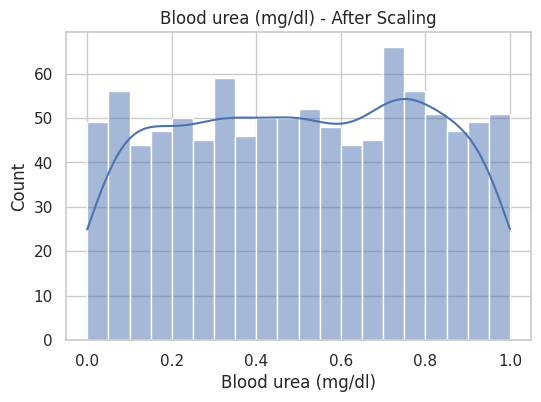

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# After (using the processed new_df with numeric values)
plt.figure(figsize=(6,4))
# Use histplot for numeric data
sns.histplot(new_df['Blood urea (mg/dl)'], bins=20, kde=True)
plt.title('Blood urea (mg/dl) - After Scaling')
plt.show()

### OTHER

1. Corelatin Heatmap

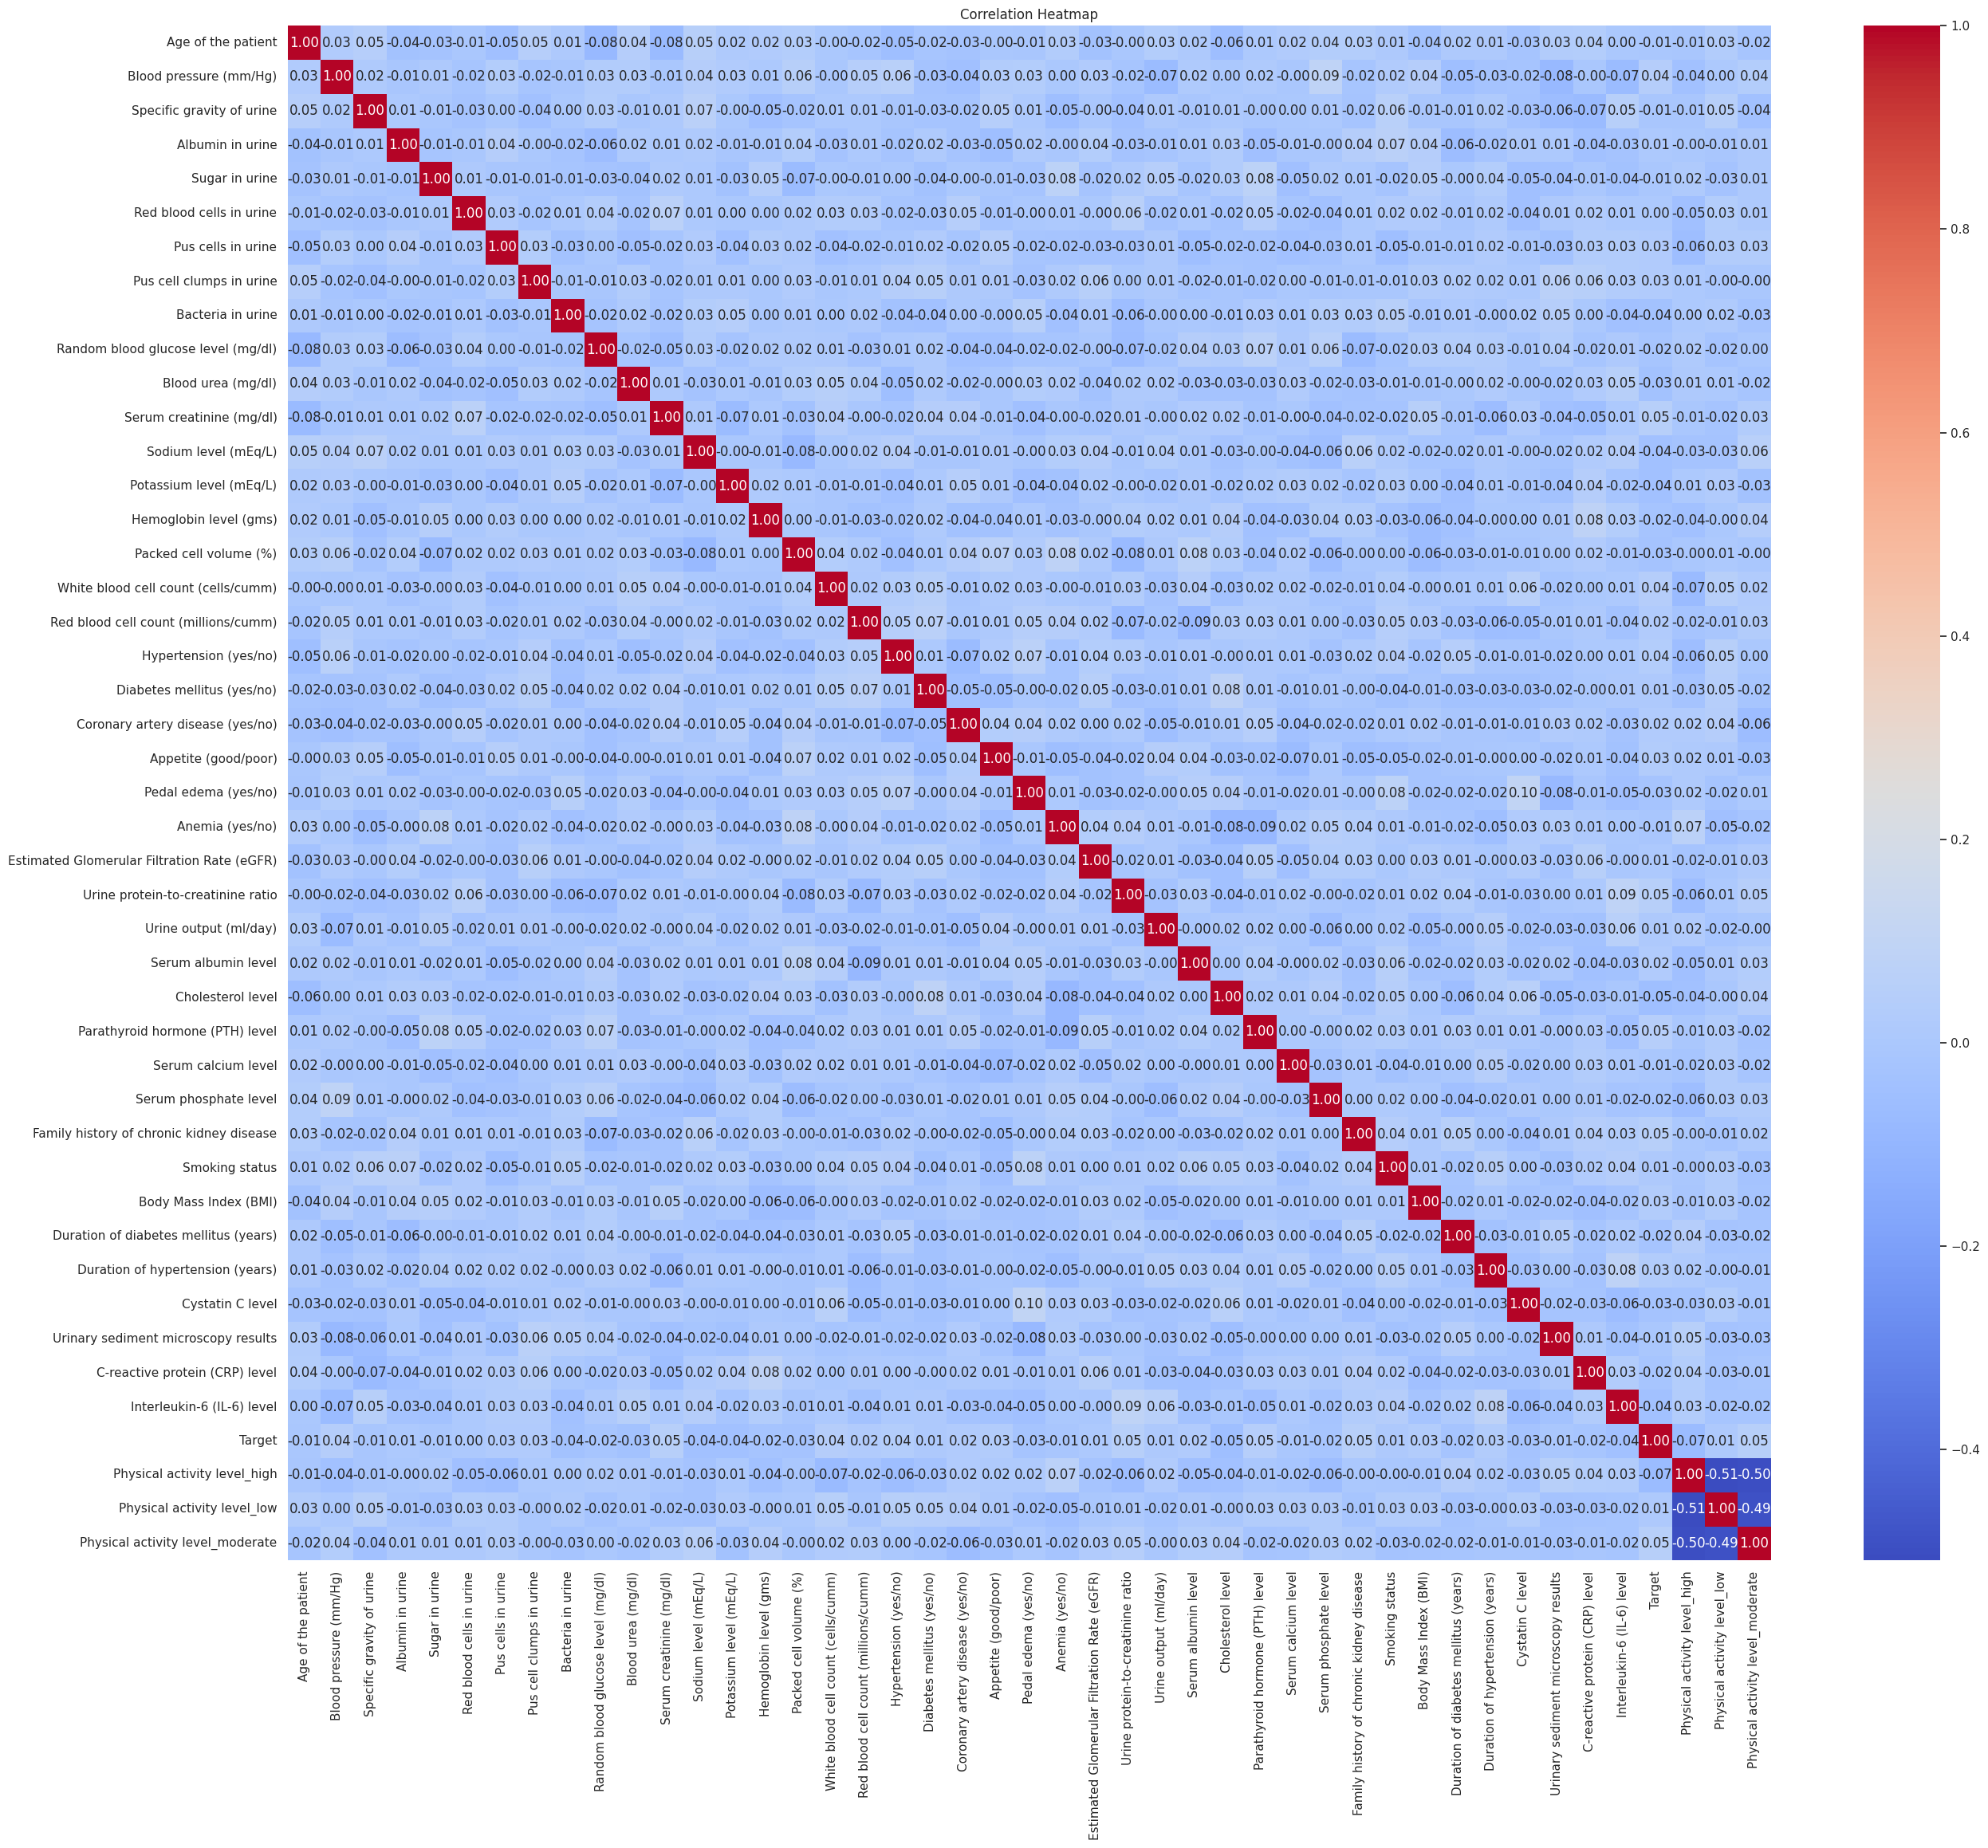

In [ ]:
plt.figure(figsize=(30, 25))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

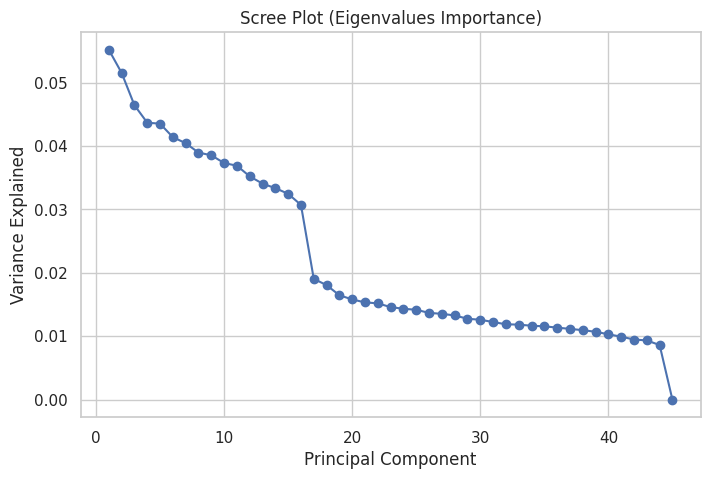

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca_result = pca.fit_transform(new_df)

# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot (Eigenvalues Importance)")
plt.show()

# Train Model Without Hyperparameter tuning on preporcessed dataset

Initial K-Nearest Neighbors Model Evaluation:
Accuracy: 0.5075
F1 Score: 0.3265
Confusion Matrix:
[[78 41]
 [58 24]]
ROC AUC Score: 0.4853


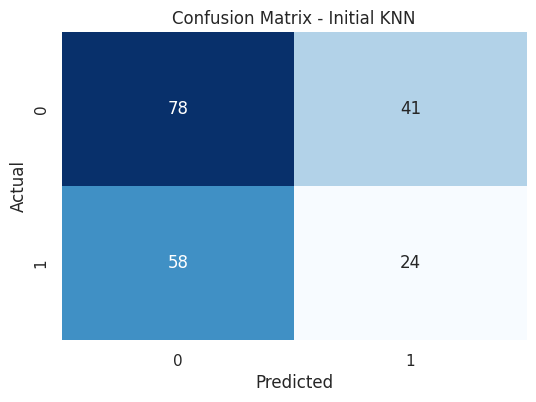

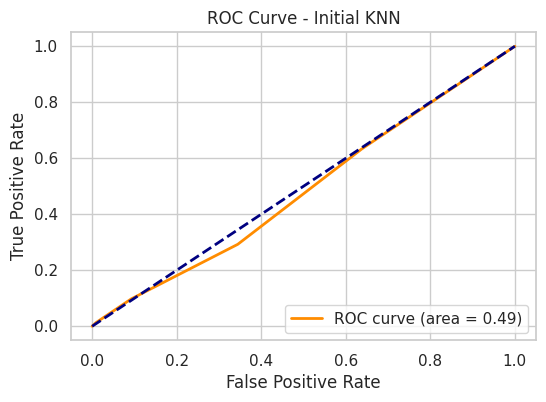

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target variable
X = new_df.drop('Target', axis=1)
y = new_df['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

# Train a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5) # Using default 5 neighbors for initial model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

# Evaluate the initial model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("Initial K-Nearest Neighbors Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Initial KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Initial KNN')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning with RandomizedSearchCV

RandomizedSearchCV Results (Optimized for F1 Score):
Best Parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 4}
Best Cross-Validation F1 Score: 0.4027

Tuned K-Nearest Neighbors Model Evaluation (Optimized for F1 Score):
Accuracy: 0.5274
F1 Score: 0.3871
Confusion Matrix:
[[76 43]
 [52 30]]
ROC AUC Score: 0.5362


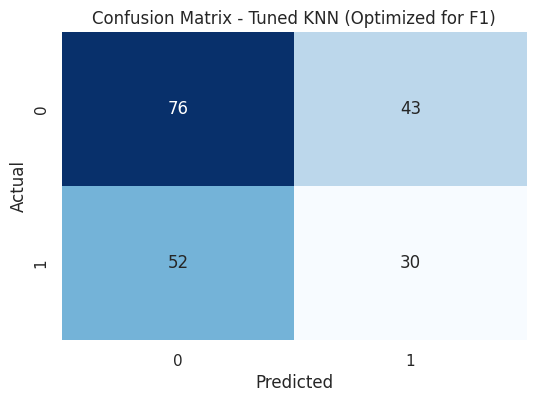

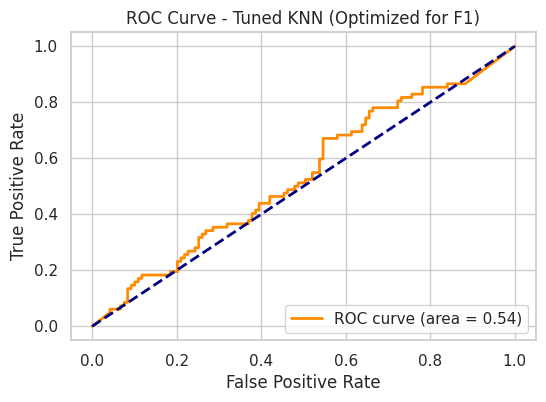

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import f1_score, make_scorer # Import make_scorer

# Define the parameter distribution for RandomizedSearchCV
param_dist = {'n_neighbors': range(1, 51), # Increased the range of neighbors to explore
              'weights': ['uniform', 'distance'], # Add weights parameter
              'p': [1, 2]} # Add p parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)


# Create an F1 scorer
f1_scorer = make_scorer(f1_score)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_dist,
    n_iter=50,  # Increased the number of iterations to explore more combinations
    cv=10,       # Increased cross-validation folds
    scoring=f1_scorer, # Use F1 score as the scoring metric for tuning
    random_state=RANDOM_SEED,
    n_jobs=-1   # Use all available cores
)

# Perform the random search
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("RandomizedSearchCV Results (Optimized for F1 Score):")
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation F1 Score: {best_score:.4f}")

# Train a new model with the best parameters
tuned_knn = KNeighborsClassifier(**best_params) # Use the best parameters found by random search
tuned_knn.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_tuned = tuned_knn.predict(X_test)
y_prob_tuned = tuned_knn.predict_proba(X_test)[:, 1]


# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

print("\nTuned K-Nearest Neighbors Model Evaluation (Optimized for F1 Score):")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"F1 Score: {f1_tuned:.4f}")
print("Confusion Matrix:")
print(conf_matrix_tuned)
print(f"ROC AUC Score: {roc_auc_tuned:.4f}")

# Plot Confusion Matrix for tuned model
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Tuned KNN (Optimized for F1)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve for tuned model
plt.figure(figsize=(6, 4))
plt.plot(fpr_tuned, tpr_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned KNN (Optimized for F1)')
plt.legend(loc="lower right")
plt.show()

# Documentation

##**Model Design and Suitability to Dataset**
#Problem Type:
This is a Binary Classification task

###Model Suitability (The Why):
**Non-Parametric Flexibility**: KNN is a _non-parametric_ model. KNN makes no assumptions about the data's underlying mathematical distribution.

**Handles Local Structure**: KNN is instance-based. It classifies a new patient based on the majority outcome of its most local neighbors.

**Requires Pre-processing**:It demands Feature Scaling and data balancing. By scaling the features, you ensure the model's distance calculations are based on true relationships, not just large numerical values.

###Data Challenge:
The dataset was imbalanced. Addressed this fundamental issue using Undersampling to create a balanced set, preventing the model from becoming biased toward the majority class.


##**Implementation Details**
###Libraries:
`pandas` for data manipulation, `KNeighborsClassifier` for the model, and `StandardScaler` and `RandomizedSearchCV` for optimization.
###Functions:
| Stage | Function/Method | Purpose |
|---|---|---|
| Data Reading/Cleaning | pd.read_csv() | Loads data from a file into a DataFrame. |
| | df.replace() | Used to clean data by replacing specific values  |
| | df.drop() | Used to remove columns or rows from the DataFrame. |
| Data Splitting | train_test_split() | Splits data into training and testing sets. |
| Pre-processing | scaler.fit_transform() | Fits the StandardScaler to the training data and then transforms it. |
| | scaler.transform() | Applies the scaling rules to the test data. |
| Model Training/Tuning | random_search.fit() | Executes the search for the optimal hyperparameters on the scaled training data. |
| | model.predict() | Generates the output predictions for the test set. |
| Evaluation | f1_score() | Calculates the F1 Score. |
| | classification_report() | Prints a formatted summary of Precision, Recall, and F1-Score for each class. |
| | confusion_matrix() | Generates the matrix used to visualize prediction errors. |

##**Parameter Tuning Methods**
Used **RandomizedSearchCV** because it is computationally more efficient than **GridSearchCV**. By sampling 100 random combinations across the hyperparameter space I was able to find a near-optimal set of parameters much faster.

| Hyperparameter | Scikit-learn Parameter Name | Purpose | Values Tested (Search Space) |
|---|---|---|---|
| Number of Neighbors | n_neighbors (K) | Defines the size of the local neighborhood used for classification. | Random integers sampled between 3 and 51. |
| Weighting Scheme | weights | Determines how the neighbors' votes are counted. | 'uniform' (all neighbors count equally) and 'distance' (closer neighbors count more). |
| Distance Metric | p | Defines the specific distance formula used between data points. | p=1 (Manhattan Distance) and p=2 (Euclidean Distance). |

##**Number and variety of the models**

| Model Variety | Pre-processing (Scaling) | Hyperparameter Tuning | Key Observation / F1 Score |
|---|---|---|---|
| 1. Untuned Baseline |  No Scaling (Raw Data) |  Fixed Parameter | Failed (F1 Score = 0.0215). Proved that unscaled data ruins the model's distance calculations. |
| 2. Scaled, but Untuned |  Standard Scaled |  Fixed Parameter  | Strong Jump (F1 Score = 0.3265). Proved that scaling is the single most effective step. |
| 3. Optimum Model |  Standard Scaled | Tuned via RandomizedSearchCV | Highest Performance (F1 Score = 0.3871). Refined the model beyond basic scaling. |


## **Model Performance Comparison**

| Model                                                 | Accuracy | F1 Score |
|-------------------------------------------------------|----------|----------|
| Base Model (on unprocessed data)                      | 0.5473   | 0.0215   |
| Initial Tuned Model (on preprocessed data)            | 0.5075   | 0.3265   |
| Tuned Model (on preprocessed data, hyperparameter used)      | 0.5274   | 0.3871   |

##**Evaluation, Validation, and Comparison**
###Evaluation Metrics
| Metric/Method | Purpose in Analysis |
|---|---|
| **F1 Score (Primary Metric)** | Optimization and Final Reporting. |
| **Recall (Sensitivity)** | Measures the proportion of actual positive cases detected. |
| **Confusion Matrix** | Provides raw counts of prediction outcomes (TP, FN, FP, TN).
###Validation Method Used

Stratified Train-Test Split (80/20):

A Train-Test Split simply divides your data into two subsets: $80\%$ for training and $20\%$ for testing.

"Stratified" means splitting function ensures that the proportional representation of classes (Severe Disease vs. No Disease) is maintained in both sets.

`train_test_split(..., test_size=0.2, stratify=y)`

5-Fold Cross-Validation (CV):

This was used internally by RandomizedSearchCV. The training data was split into five folds, and the model was trained five separate times.

###Limitations, Observations, and Improvements Suggested
**Limitations and Observations**

Scaling Dependence (Observation):

The model is critically dependent on `StandardScaler`.

Computational Cost (Limitation):

KNN is slow for prediction on very large datasets because it has to calculate the distance to every single training example for each new prediction.

**Improvements Suggested**

Dimensionality Reduction (PCA):

To mitigate the high computational cost, the next step would be to apply Principal Component Analysis (PCA) after scaling.

Testing Other Kernels:

 We could compare the KNN model against other complex non-linear classifiers, such as a tuned Support Vector Machine (SVM) with a Radial Basis Function (RBF) kernels.